In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uc
plt.style.use(['science', 'notebook', 'ieee'])
plt.rcParams['font.family']='times new roman'

# Part 1

In [2]:
#Frequency (Hz) and displacement (m) for four trials
f1 = np.array([48.0, 100.7, 152.2, 201.0, 250.9, 301.2, 352.1, 396.8, 454.5, 500.0, 555.6, 595.8]) #Hz
d1 = np.array([0, -.3, -.31, -.65, -.86, -1.15, -1.35, -1.54, -1.68, -1.87, -2.16, -2.35])#mm

f2 = np.array([50.1, 102.5, 151.1, 201.0, 255.1, 304.2, 357.1, 403.3, 448.7, 500.0, 555.6, 595.8])
d2 = np.array([0, .06, -.15, -.43, -.56, -.74, -.86, -.96, -1.43, -1.77, -1.93, -1.93])#/100

f3 = np.array([47.8, 101.2, 150.4, 204.9, 255.1, 301.2, 352.1, 403.3, 454.5,  500.0, 555.5, 609.8])
d3 = np.array([0, -.15, -.39, -.67, -.67, -.83, -1.08, -1.28, -1.46, -1.65, -1.89, -2.15])#/100

f4 = np.array([50.0, 102.5, 155.3, 200.0, 257.7, 301.2, 357.1, 403.3, 446.4, 500.0, 555.6, 609.7])
d4 = np.array([0, -.19, -.40, -.61, -.85, -1.06, -1.31, -1.59, -1.70, -1.98, -2.13, -2.38])#/100



[-0.00425405  0.20068634] 0.00010649965236125033
Slope of Graph 1, using data from Table 1: -0.00425 +/- 0.01


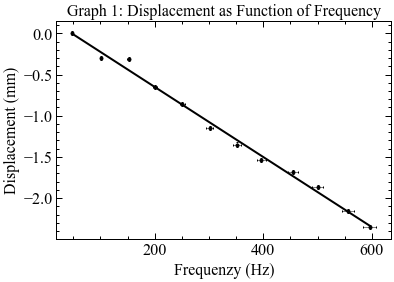

[-0.00397875  0.40954985] 0.0002320812413190372
Slope of Graph 2, using data from Table 2: -0.00398 +/- 0.02


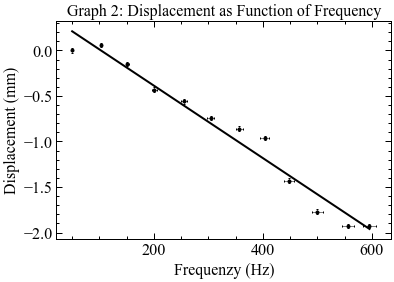

[-0.0037467   0.21052039] 0.0001011429302693138
Slope of Graph 3, using data from Table 3: -0.00375 +/- 0.01


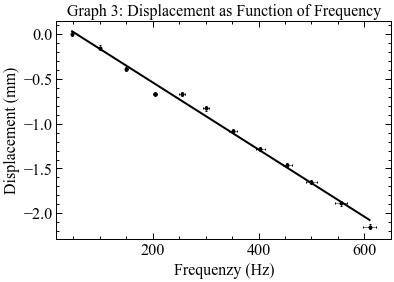

[-0.00435519  0.2461857 ] 6.276232550610146e-05
Slope of Graph 4, using data from Table 4: -0.00436 +/- 0.01


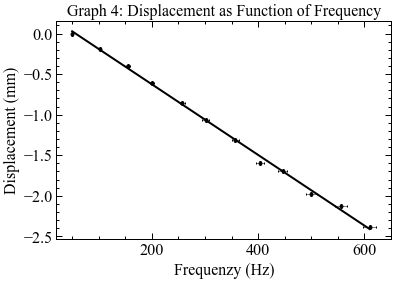

In [21]:
#note: use np.polyfit, not np.polynomial... (polyfit returns coef in descending order; easier to plot)
#note on uncertainty of polynomial approx with polyfit:
    #if full='true', returns residuals (among other things), which is sum of squared residuals of the least-squares fit
    #if cov='true', returns covariance matrix. The sqrt of the diagonals is the stddev of that coef (so stddev of slope is sqrt(cov[0][0]))
    #so here, want uncertainty of slope, so use cov: sqrt(V[0][0]). sqrt(V[1][1]) is stddev of y-intercept.
    
    
slopes=[]; slopes_std=[]
count=1
for f,d in zip([f1,f2,f3,f4],[d1,d2,d3,d4]):
    p, V = np.polyfit(f,d, 1, cov='True') #polynomial approx and covariance matrix(for slope uncertainty)
    print(p, np.sqrt(V[0][0]))
    d_fit = np.polyval(p,f) #linear fit, to plot
    #uncertainties of measurements, to compare data to best-fit line
    d_err = 0.025 #mm, uncertainty of displacement measurements
    f_err = .02*f #Hz, uncertainty of freq measurements 
    plt.plot(f, d_fit)
    plt.errorbar(f,d,yerr=d_err, xerr=f_err, fmt='.k', elinewidth=.5, capsize=1)
    slopes.append(p)
    slopes_std.append(np.sqrt(V[0][0]))
    plt.ylabel("Displacement (mm)")
    plt.xlabel("Frequenzy (Hz)")
    plt.title("Graph %d: Displacement as Function of Frequency" %(count))
    #plt.savefig('graph'+str(count)+'.png')
    #since uncertainty due to scatter of data points dominates, use std dev of slope.
    print("Slope of Graph {:d}, using data from Table {:d}: {:.5f} +/- {:.2f}".format(count, count, p[0], np.sqrt(V[0][0])*100))
    count += 1
    plt.show()


In [22]:
#mean slope
slopes = np.array([i[0] for i in slopes])
print(slopes)
slopes = slopes/1000
slope_avg = np.mean(slopes)
slope_std = np.std(slopes)
print("Average slope = {:.3} +/- {:.3} m/Hz".format(slope_avg, slope_std))
slope_avg, slope_std

[-0.00425405 -0.00397875 -0.0037467  -0.00435519]
Average slope = -4.08e-06 +/- 2.38e-07 m/Hz


(-4.083671752387461e-06, 2.383872996026522e-07)

## part 1 analysis

In [23]:
m1m2 = uc.ufloat(8.67, 0.01)
rm1 = uc.ufloat(6.79, .01)
rtobeam = uc.ufloat(5.75, .01)
beamtoplane = uc.ufloat(.830, .005)
a = m1m2 + rm1
b = beamtoplane + rtobeam
a.n, b.n

(15.46, 6.58)

In [6]:
#where a, b are uncertainty.ufloat objects
def consistencycheck(a,b):
    if(abs(a.n-b.n) <= a.s+b.s):
        return True
    else:
        return False

In [24]:
# v = 2a/t = 8*pi*a*b*f/y = 4*pi*a*b/slope_avg since f=f/2
slope_a = uc.ufloat(slope_avg, slope_std)
print(repr(slope_a))
v = 4*np.pi*a*b/abs(slope_a)
print(repr(v))
print("speed of light, v = ", v)

v_accept =  uc.ufloat(299792458, 0)

print(consistencycheck(v,v_accept))
print('% error = ', (v.n - v_accept.n)/v_accept.n)

-4.083671752387461e-06+/-2.383872996026522e-07
313036097.8365686+/-18283690.935209483
speed of light, v =  (3.13+/-0.18)e+08
True
% error =  0.044176027392152054


# Part 2

In [26]:
#average distance from box to laser's wall:
dl = uc.ufloat(np.mean([2.856, 2.851, 2.849]), np.std([2.856, 2.851, 2.849])*np.mean([2.856, 2.851, 2.849]))
#distance from diode plane to M0 = (desk to M0) - (desk to diode plane):
dm0 = uc.ufloat(1.143, .02*1.143) - uc.ufloat(.398, .02*.398) 
#distance from wall to laser:
wall_laser = uc.ufloat(.145,.005)
#distance from M0 to box = (box to laser's wall) - (wall to laser)
m0b = dl - wall_laser
#length of range finder:
rf = uc.ufloat(.190, .005)

#distance from box to mirror's wall for M1, M2, M3:
bm1_wall = np.array([uc.ufloat(46.292, .002), uc.ufloat(19.935, .002), uc.ufloat(13.102, .002)])
#distance from wall to mirror for M1, M2, M3:
wm1 = np.array([uc.ufloat(.12, .01), uc.ufloat(.107, .002), uc.ufloat(.125, .002)])
#distance from box to mirror for M1, M2, M3: 
bm1 = bm1_wall - wm1
#total distance travelled = 2*((wall to M0) + (M0 to box) + (box to mirror) - (length range finder) + (distance from beam splitter to PD2) - (beam splitter to PD1))
# since distance from beam splitter to PD1 and PD2 are the same, they cancel out, and total distance is:
d_tot = 2*(dm0 + m0b + (bm1 - rf))
#get numerical value of total distance (no uncertainty)
d_totn = [i.n for i in d_tot]
d_totn.sort()
#time array:
t = np.array([118.0, 164.0, 340.0])*10**(-9)    

[98.86800000000001+/-0.05693628139127672 46.18+/-0.05345783514758752
 32.478+/-0.05345783514758752]


[ 2.99140041e+08 -2.84636846e+00] 254332.40954116848
Slope of Graph 5:  299140040.78857905 254332.40954116848


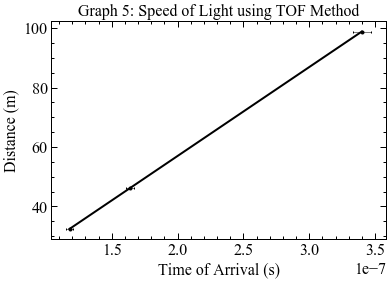

False
% error =  0.0021762295681933175


In [32]:
p, V = np.polyfit(t, d_totn, 1, cov='True') #polynomial approx and covariance matrix(for slope uncertainty)
print(p, np.sqrt(V[0][0]))
v_fit = np.polyval(p,t) #linear fit, to plot
#uncertainties of measurements, to compare data to best-fit line
t_err = .02*t 
d_err = [i.s for i in d_tot] 
#d_err.append(0)
plt.plot(t, v_fit)
plt.errorbar(t,d_totn,yerr=d_err, xerr=t_err, fmt='.k', elinewidth=.5, capsize=1)
plt.ylabel("Distance (m)")
plt.xlabel("Time of Arrival (s)")
plt.title("Graph 5: Speed of Light using TOF Method")
plt.savefig('graph5.png')
#since uncertainty due to scatter of data points dominates, use std dev of slope.
print("Slope of Graph 5: ", p[0], np.sqrt(V[0][0]))
plt.show()


print(consistencycheck(uc.ufloat(p[0], np.sqrt(V[0][0])), v_accept))
print('% error = ', abs(p[0] - v_accept.n)/v_accept.n)

\textbf{\textit{Michelson Rotating Mirror Method}}\\


\textbf{\textit{Time of Flight Method}}\\

\begin{figure}[h!]
\centering
\includegraphics[scale=0.75]{graph1.png} 
\caption{Graph 1: Displacement (mm) as a Function of Frequency (Hz), using data from Table 1. Error bars for the displacement and frequency measurements are included. See Appendix for a larger image. Slope = $-0.00425mm/Hz \pm 0.01\%$}
\end{figure}

\begin{figure}[h!]
\centering
\includegraphics[scale=0.75]{graph2.png} 
\caption{Graph 2: Displacement (mm) as a Function of Frequency (Hz), using data from Table 2. Error bars for the displacement and frequency measurements are included. See Appendix for a larger image. Slope = $-0.00398mm/Hz \pm 0.02\%$}
\end{figure}

\begin{figure}[h!]
\centering
\includegraphics[scale=0.75]{graph3.png} 
\caption{Graph 3: Displacement (mm) as a Function of Frequency (Hz), using data from Table 3. Error bars for the displacement and frequency measurements are included. See Appendix for a larger image. Slope = $-0.00375mm/Hz \pm 0.01\%$}
\end{figure}

\begin{figure}[h!]
\centering
\includegraphics[scale=0.75]{graph4.png} 
\caption{Graph 4: Displacement (mm) as a Function of Frequency (Hz), using data from Table 4. Error bars for the displacement and frequency measurements are included. See Appendix for a larger image. Slope = $-0.00436mm/Hz \pm 0.01\%$}
\end{figure}


\begin{figure}[h!]
\centering
\includegraphics[scale=0.6]{graph5.png} 
\caption{Graph 5: Speed of light using TOF method. Error bars for the distance and time measurements are included. Slope = $\SI{291726008(4839688)}{m/s}$}
\end{figure}